In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

In [36]:
machine = 'quartz'
df = pd.read_csv('{0}/out_log_full_complete.csv'.format(machine), header=None, names=['pkg', 'cfg', 'iter', 'setup', 'load', 'ground', 'solve', 'total', 'dep_len'])
df_full = df

In [37]:
df_old = pd.read_csv('{0}/log_old_concretizer.csv'.format(machine), header=None, names=['pkg', 'iter', 'success', 'total'])

In [27]:
df_deps = pd.read_csv('{0}/out_log_full_crs_0.csv'.format(machine), header=None, names=['pkg', 'cfg', 'iter', 'setup', 'load', 'ground', 'solve', 'total', 'dep_len'])

In [28]:
packs_deps = df_deps['pkg']

In [29]:
packs = df_full['pkg']
pk_ls = sorted(list(set(packs).intersection(set(packs_deps))))
print(len(pk_ls))

5737


In [30]:
df_full.head()

,pkg,cfg,iter,setup,load,ground,solve,total,dep_len
0,abduco,tweety,0,0.045349,0.006483,0.015244,0.001473,0.076156,NaN
1,anaconda2,tweety,0,0.045062,0.005610,0.015880,0.002186,0.077464,NaN
2,argon2,tweety,0,0.051584,0.006276,0.015287,0.001462,0.084181,NaN
3,argp-standalone,tweety,0,0.051302,0.005558,0.014860,0.001433,0.082910,NaN
4,aespipe,tweety,0,0.050730,0.006757,0.018693,0.001763,0.086676,NaN


In [31]:
confs = df_full['cfg']
cfg_ls = list(set(confs))
print(cfg_ls)

[' many', ' trendy', ' tweety', ' handy']


In [32]:
phases = ['setup', 'load', 'ground', 'solve', 'total']

In [33]:
timings = {}
deps = []

for pk in pk_ls:
    req_pk = (df_deps['pkg'] == pk)
    tdf = df_deps[req_pk]
    deps.append(tdf['dep_len'].median())

for cf in cfg_ls:
    timings[cf] = {}
    for ph in phases:
        timings[cf][ph] = []
    for pk in pk_ls:
        req_pk = (df_full['pkg'] == pk)
        req_cf = (df_full['cfg'] == cf)
        tdf = df_full[req_pk & req_cf]
        for ph in phases:
            timings[cf][ph].append(tdf[ph].median())

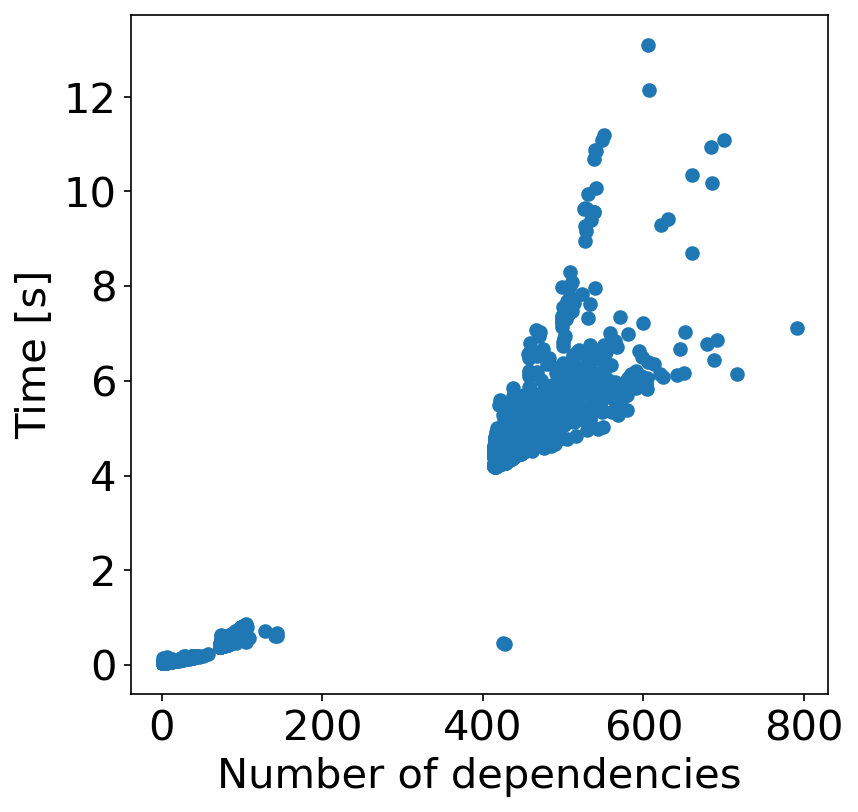

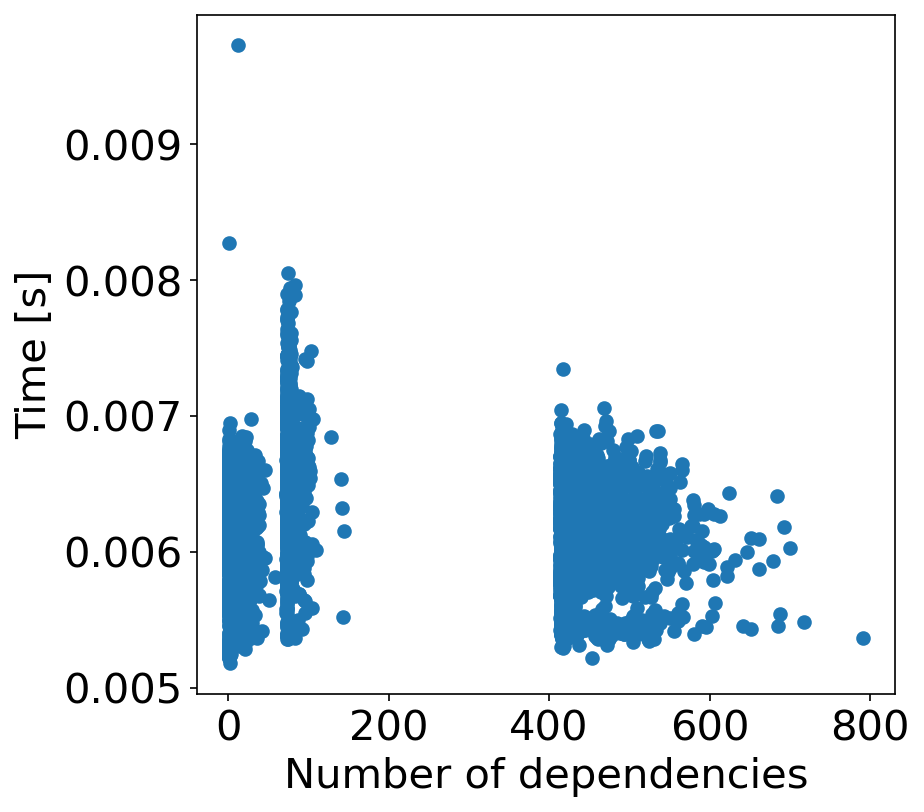

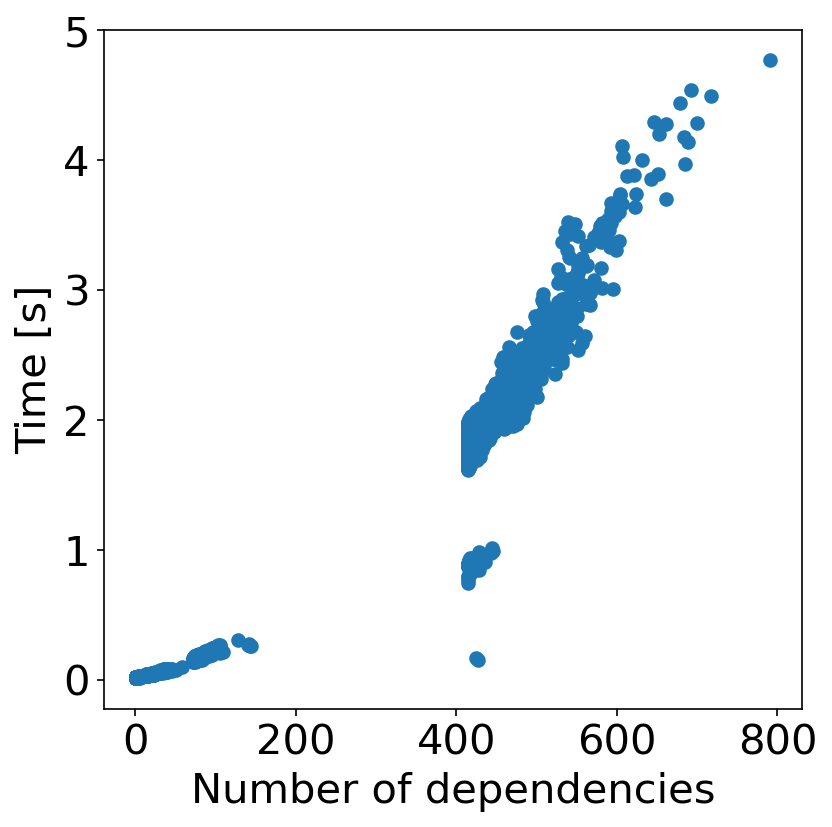

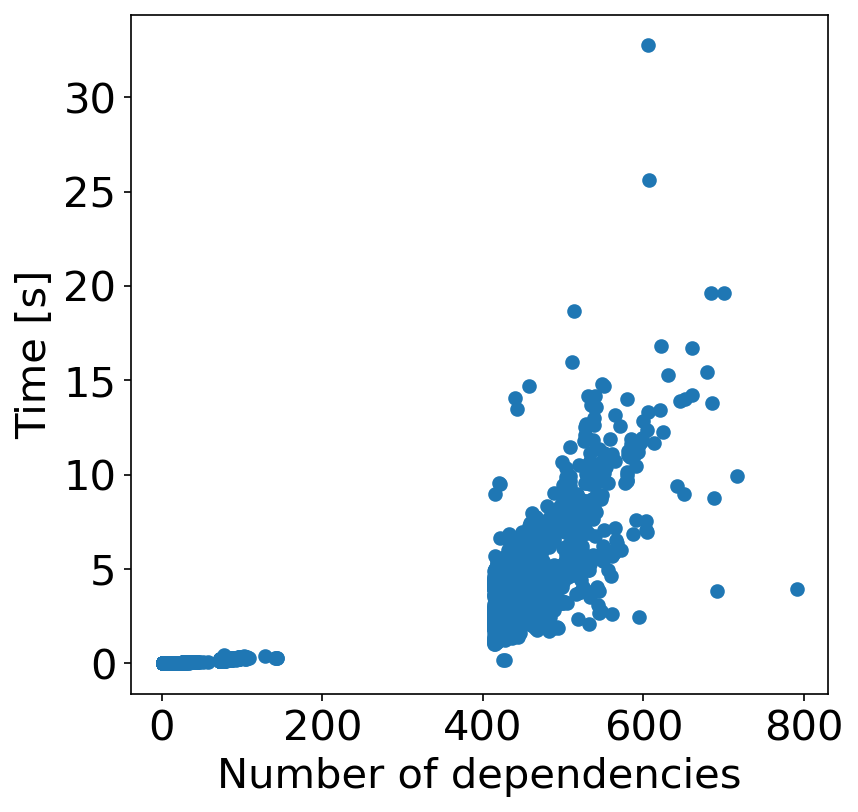

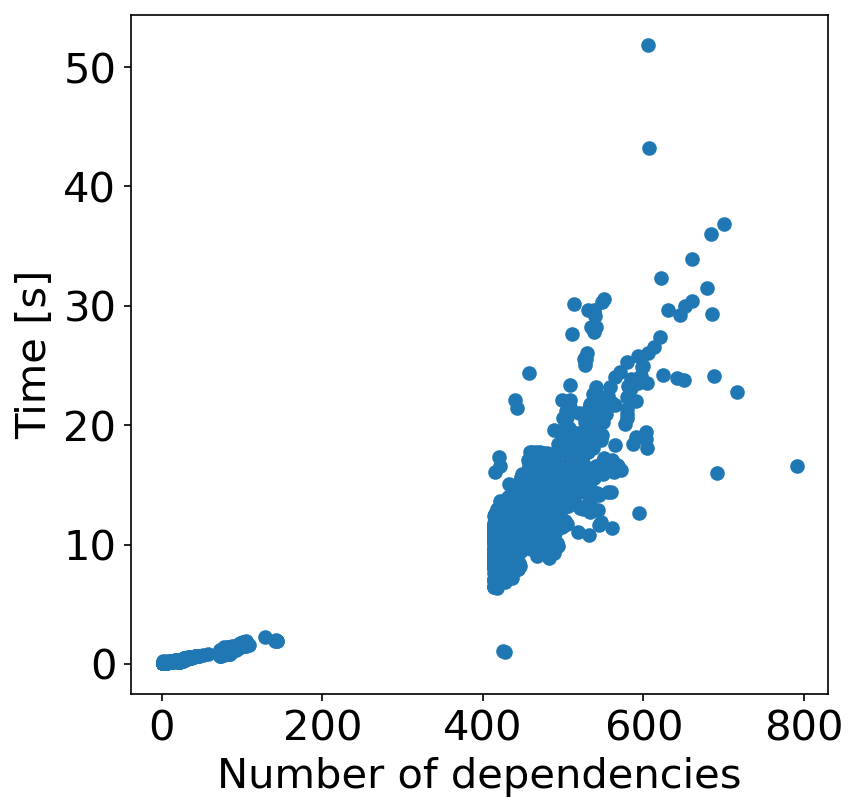

In [34]:
for i, ph in enumerate(phases):
    fig = plt.figure(figsize=(6, 6), dpi=150)
    ax = fig.add_subplot(1, 1, 1)

    n_bins = 500

#     cfgs = [' tweety', ' many']
    cfgs = [' tweety']
    colors = ['red', 'blue', 'magenta', 'black', 'black']

    fntsz = 20
    
#     ph = phases[0]

    for j, cf in enumerate(cfgs):
        ax.scatter(deps, timings[cf][ph])
        ax.set_xlabel('Number of dependencies', fontsize=fntsz)
        ax.set_ylabel('Time [s]', fontsize=fntsz)
        ax.tick_params(axis='both', labelsize=fntsz)
#         solve_times = sorted(zip(pk_ls, timings[cf][ph]), key=lambda x: x[1], reverse=True)
#         tab_data = [[p, "{:.3f}".format(t)] for p, t in solve_times[0:5]]
#         arr = np.array(sorted(timings[cf][ph], reverse=True))
#         values, base = np.histogram(arr, bins=n_bins)
#         cumulative = np.cumsum(values)
#         ax.plot(base[:-1], cumulative, c=colors[j], label=cf)
#         ax.legend(fontsize='medium')
#         ax.set_xlabel('Time [s]')
#         ax.set_ylabel('Package count')
#         ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
    #     ax.title.set_text(ph)

    # plt.show()
    plt.savefig('deps_{0}_{1}_fig_n.pdf'.format(machine, ph), dpi=150, bbox_inches='tight')

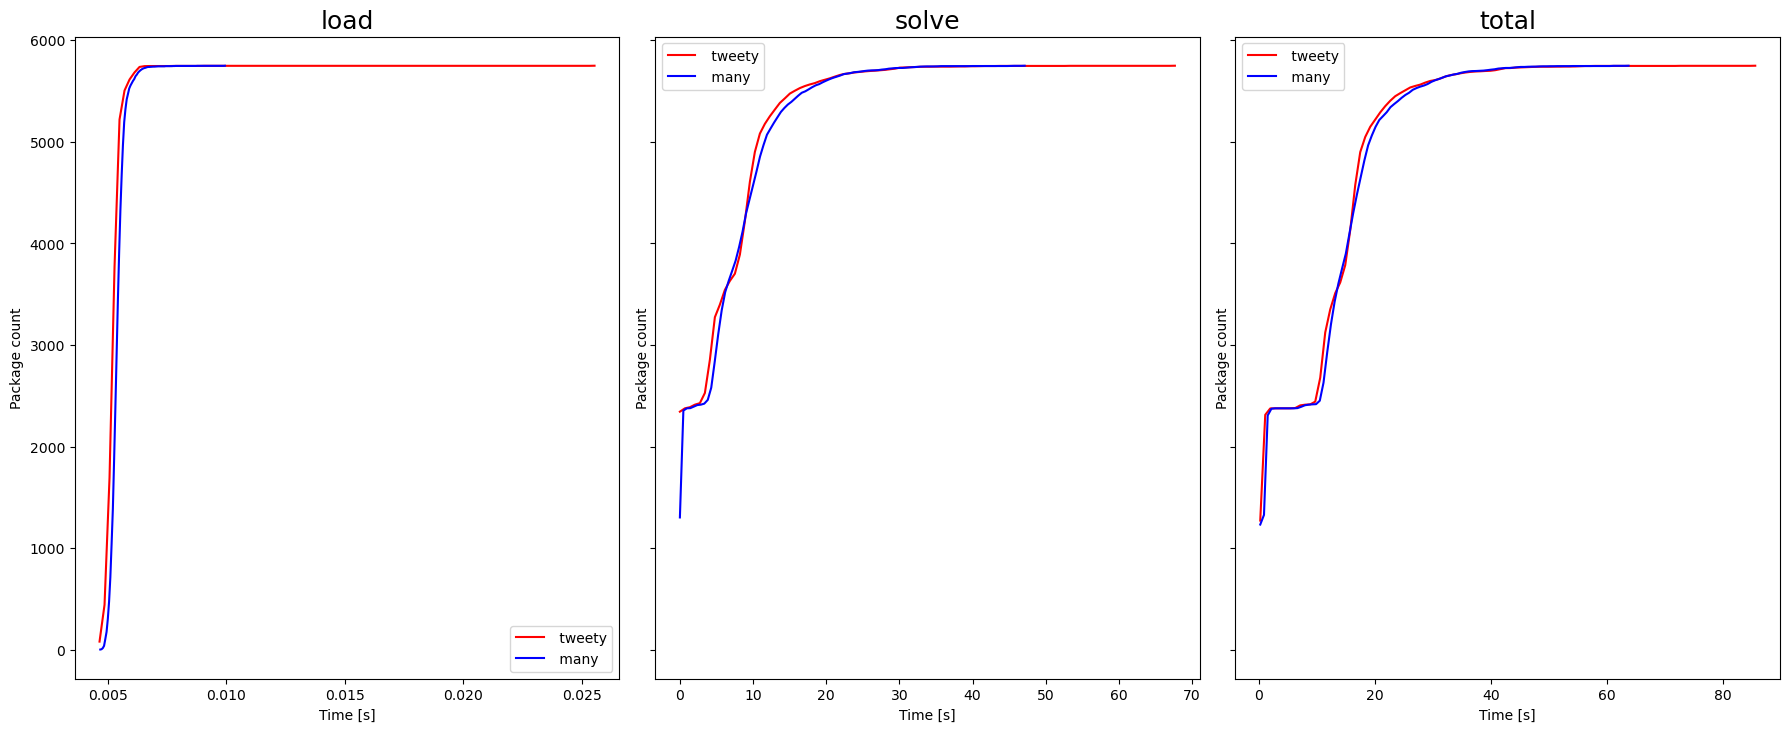

In [22]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(18,14), dpi=100)
axes = list(axs.flatten())
n_bins = 100

# fig.suptitle('CDF', fontsize=24)

# axes[5].remove()

cfgs = [' tweety', ' many']
# cfgs = [' many', ' trendy', ' handy', ' tweety']

colors = ['red', 'blue', 'magenta', 'black', 'black']
phs_r = ['load', 'solve', 'total']

for l in range(len(phs_r), 6):
    axes[l].remove()

for j, cf in enumerate(cfgs):
    for i, ph in enumerate(phs_r):
        solve_times = sorted(zip(pk_ls, timings[cf][ph]), key=lambda x: x[1], reverse=True)
        tab_data = [[p, "{:.3f}".format(t)] for p, t in solve_times[0:5]]
        arr = np.array(sorted(timings[cf][ph], reverse=True))
        values, base = np.histogram(arr, bins=n_bins)
        cumulative = np.cumsum(values)
    #         print(solve_times[0:5])
    #         [p for p, t in solve_times[0:5]]

    #         axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph, density=True, cumulative=True)
#         if cf == ' tweety':
#             axes[i].plot(base[:-1], cumulative, c='blue', label=cf)
    #        axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph)
#         else:
#             axes[i].plot(base[:-1], cumulative, c='red', label=cf)
        axes[i].plot(base[:-1], cumulative, c=colors[j], label=cf)
#             axes[i].hist(sorted(tms[cf_base][ph], reverse=True), n_bins, label=ph, density=True, cumulative=True, c='blue', label='single-shot')
        axes[i].legend(fontsize='medium')
    #         tab = axes[i].table(cellText=[["{:.3f}".format(t) for p, t in solve_times[0:5]], [p for p, t in solve_times[0:5]]],
    #                       rowLabels=['times', 'pkg'],
        axes[i].set_title(ph, fontsize=18)
        axes[i].set_xlabel('Time [s]')
        axes[i].set_ylabel('Package count')
        axes[i].title.set_text(ph)
#         tab = axes[i].table(cellText=tab_data, bbox=[0.1, -0.5, 0.75, 0.4])
#         tab.auto_set_font_size(False)
#         tab.auto_set_column_width(col=[0, 1])
#         tab.set_fontsize(12)
# plt.show()
plt.savefig('cdf_quartz_fig.pdf', dpi=150)